today we want to use regression models to predict the house prices of boston, the dataset came from here:https://www.kaggle.com/datasets/schirmerchad/bostonhoustingmlnd and the labels are the price for these houses

# Data Extraction

first we import the neccery libaries to use for computing and other stuff

In [175]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

we import our data at first and make it a pandas dataframe to be able to use it for these purposes

In [176]:
df = pd.read_csv('housing.csv')
df = pd.DataFrame(df)
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


we describe it so we can get a feel for this data

In [177]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


then we check if we have Nan values but gladly we dont

In [178]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

now we drop duplicates to stop the model from overfitting a certain row

In [179]:
df.drop_duplicates()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0
...,...,...,...,...
484,6.593,9.67,21.0,470400.0
485,6.120,9.08,21.0,432600.0
486,6.976,5.64,21.0,501900.0
487,6.794,6.48,21.0,462000.0


now we call the features as x and the labels as y to be able to use it here

In [180]:
y = df.iloc[:,-1].astype(int)
x = df.iloc[:, :-1]
x

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7
...,...,...,...
484,6.593,9.67,21.0
485,6.120,9.08,21.0
486,6.976,5.64,21.0
487,6.794,6.48,21.0


# Data Visuals

In [181]:
import seaborn as sns

now we use seaborn pairplot to see how the data scatters

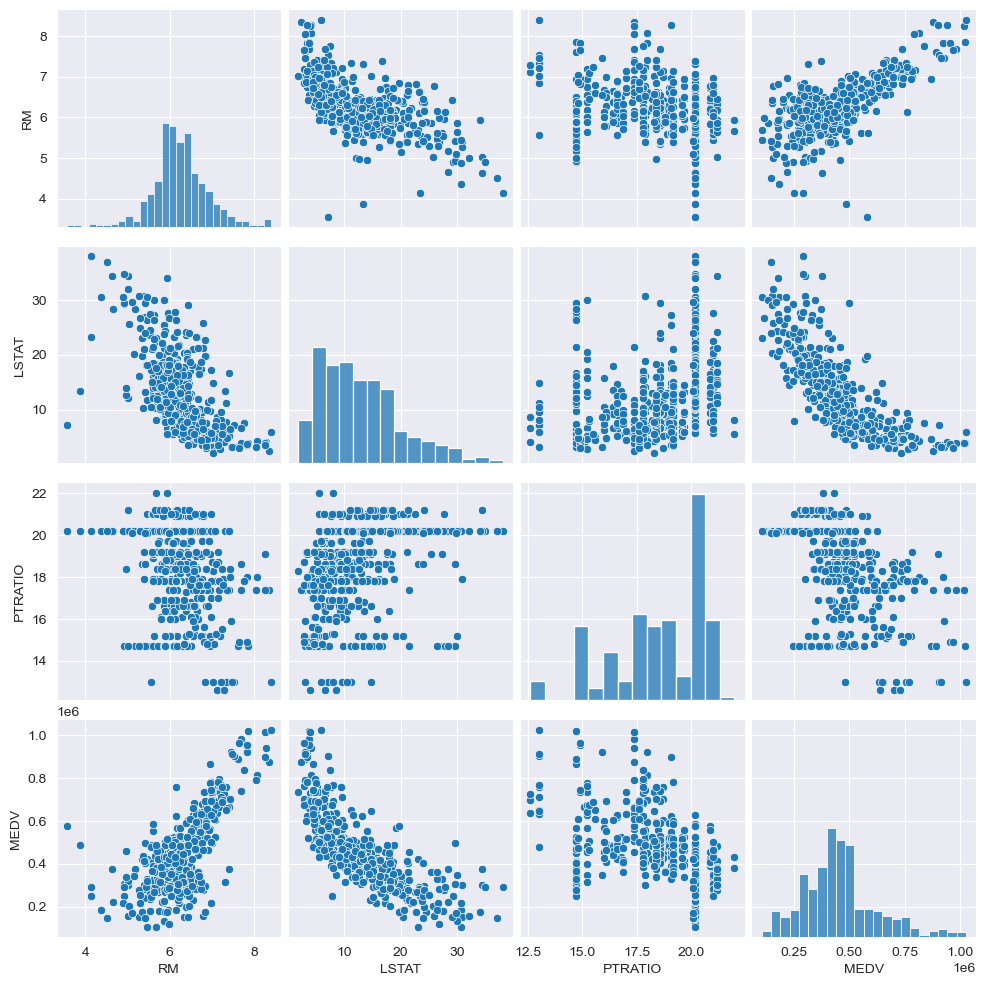

In [182]:
sns.pairplot(df)

#Preprocessing

now we start with preprocessing our data both with standard scaler and the min max scaler to be able to do the polynominal regression

In [183]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

we perform the standard scaler and call is x_s and for the min max scaler we call it x_m

In [184]:
scaler = StandardScaler()
x_s = scaler.fit_transform(x)

In [185]:
min_max_scaler = MinMaxScaler()
x_m= min_max_scaler.fit_transform(x)

now we split both to be able to test and train our data

In [186]:
x_train_s, x_test_s, y_train, y_test = train_test_split(x_s, y, test_size=0.2, random_state=42)

In [187]:
x_train_m, x_test_m, y_train, y_test = train_test_split(x_m, y, test_size=0.2, random_state=42)

# Linear Regression

What is linear regression? Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

we start by calling the model

In [188]:
lin_reg = LinearRegression()

then fitting and predicting the data (scaled data)

In [189]:
lin_reg.fit(x_train_s, y_train)

LinearRegression()

In [190]:
y_pred_lr_s = lin_reg.predict(x_test_s)
y_pred_lr_s_train = lin_reg.predict(x_train_s)

we print the related metrics to be able to compare the results

In [191]:
lin_reg.coef_

array([ 56147.41699258, -75138.29845742, -40757.26134871])

In [192]:
lin_reg.intercept_

457694.55804207415

we get the scores for train data and then the test data

In [193]:
print('Mean squared error train %.2f' % mean_squared_error(y_train, y_pred_lr_s_train))
print('R² score train: %.2f' % r2_score(y_train, y_pred_lr_s_train))

Mean squared error train 7949715203.59
R² score train: 0.72


In [194]:
print('Mean squared error test: %.2f' % mean_squared_error(y_test, y_pred_lr_s))
print('R² score test: %.2f' % r2_score(y_test, y_pred_lr_s))

Mean squared error test: 6789025559.27
R² score test: 0.69


now we do the same for min max data

In [195]:
lin_reg.fit(x_train_m, y_train)

LinearRegression()

In [196]:
y_pred_lr_m = lin_reg.predict(x_test_m)
y_pred_lr_m_train = lin_reg.predict(x_train_m)

and here are the results with min max data and linear regression which is same as the scaled data

In [197]:
lin_reg.coef_

array([ 422377.49890323, -382236.7369749 , -181649.45678709])

In [198]:
lin_reg.intercept_

454465.5896339207

we get the scores for train data and then the test data

In [199]:
print('Mean squared error train linear: %.2f' % mean_squared_error(y_train, y_pred_lr_m_train))
print('R² score train linear: %.2f ' % r2_score(y_train, y_pred_lr_m_train))

Mean squared error train linear: 7949715203.59
R² score train linear: 0.72 


In [200]:
print('Mean squared error test linear: %.2f' % mean_squared_error(y_test, y_pred_lr_m))
print('R² score test linear: %.2f ' % r2_score(y_test, y_pred_lr_m))

Mean squared error test linear: 6789025559.27
R² score test linear: 0.69 


# Decision Tree Regressor

now we use another method that is a tree method

a Decision Tree Regressor tries to predict a continuous target variable by cutting the feature variables into small zones, and each zone will have one prediction.

we import it first

In [201]:
from sklearn.tree import DecisionTreeRegressor

we set a random state after calling it to get consistent scores

In [202]:
tree_reg = DecisionTreeRegressor(random_state=42)

we now fit the model

In [203]:
tree_reg.fit(x_train_s, y_train)

DecisionTreeRegressor(random_state=42)

and here we predict the label

In [204]:
y_pred_tr_s = tree_reg.predict(x_test_s)
y_pred_tr_s_train = tree_reg.predict(x_train_s)

we get the scores for train data and then the test data

In [205]:
print('Mean squared error tree regressor train: %.2f' % mean_squared_error(y_train, y_pred_tr_s_train))
print('R² score tree regressor train: %.2f' % r2_score(y_train, y_pred_tr_s_train))

Mean squared error tree regressor train: 0.00
R² score tree regressor train: 1.00


here we get all the scores, as you can see the R² is 0.71 which is better than linear regression

In [206]:
print('Mean squared error tree regressor test: %.2f' % mean_squared_error(y_test, y_pred_tr_s))
print('R² score tree regressor test: %.2f' % r2_score(y_test, y_pred_tr_s))

Mean squared error tree regressor test: 6396165000.00
R² score tree regressor test: 0.71


# Polynomial regression

Polynomial regression is a form of Linear regression where only due to the Non-linear relationship between dependent and independent variables, we add some polynomial terms to linear regression to convert it into Polynomial regression.

in order to do the polynominal regression we need to do another preprocessing to change the features and we need to do it on the min max data, For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each

In [207]:
from sklearn.preprocessing import PolynomialFeatures

In [208]:
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x_m)

now we split this new dataset

In [209]:
x_train_p ,x_test_p ,y_train ,y_test = train_test_split(x_poly, y, test_size=0.3, random_state=42)

the rest of the steps are exactly the same

In [210]:
lin_reg.fit(x_train_p, y_train)

LinearRegression()

In [215]:
y_pred_pr = lin_reg.predict(x_test_p)
y_pred_pr_train = lin_reg.predict(x_train_p)

In [212]:
lin_reg.coef_

array([       0.        , -2146786.49064462,   -45728.03042097,
         110040.74115945,  4671553.75061584,  2445663.80717232,
         217139.40031814, -1651490.58153784,   702058.02238148,
        -120449.51021617, -1885341.25729361, -3670302.14306642,
        -733865.69579752,   119563.47599364,  -449896.08985989,
         134584.61564313,  1353587.49946941,  -367380.59838522,
        -402221.7830433 ,   -31494.58808437])

we get the scores for train data and then the test data

In [217]:
print('Mean squared error test Polynomial train: %.2f' % mean_squared_error(y_train, y_pred_pr_train))
print('R² score test Polynomial train: %.2f' % r2_score(y_train, y_pred_pr_train))

Mean squared error test Polynomial train: 4395887187.51
R² score test Polynomial train: 0.85


but as you can see the results are way different, now we have the R² = 0.83 which is really good

In [213]:
print('Mean squared error test Polynomial test: %.2f' % mean_squared_error(y_test, y_pred_pr))
print('R² score test Polynomial test: %.2f' % r2_score(y_test, y_pred_pr))

Mean squared error test Polynomial: 3938157480.20
R² score test Polynomial: 0.83


# Result

as you can see the polynominal regression did the best of all with R squared of 85